In [57]:
#Importing libraries
import pandas as pd #Data manipulation
from sklearn.datasets import load_iris #Iris dataset
import matplotlib.pyplot as plt #Plotting
from scipy import stats #Statistical measures
import numpy as np #Multidimensional array
from sklearn.model_selection import train_test_split #Holdout cross validation (70%-30%)
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.manifold import TSNE #Dimensionality reduction
from sklearn import svm #SVM
from mlxtend.plotting import plot_decision_regions #Plotting decision boundaries
%matplotlib inline

In [58]:
#Plotting decision boundaries using plotly library
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [3]:
#Load iris data
iris_data = load_iris()

In [4]:
#Check the different components in iris_Data
iris_data.keys()

dict_keys(['target_names', 'data', 'target', 'feature_names', 'DESCR'])

In [5]:
#Converting iris data into pandas data frame
df = pd.DataFrame(iris_data['data'])

In [6]:
#Checking the feature names in iris data
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#Attaching feature names to pandas iris dataframe
df.columns = iris_data['feature_names']

In [8]:
#Attaching target variable to pandas data frame
df['target'] = iris_data['target']

In [9]:
#Checking the class labels in target variable
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [10]:
#Funtion to Encode the target variable
def encode(x):
    if (x==0):
        return(iris_data['target_names'][0])
    elif (x==1):
        return(iris_data['target_names'][1])
    else:
        return(iris_data['target_names'][2])

In [11]:
#Encoding the target variable
df['target']= df['target'].apply(lambda x: encode(x) )

In [12]:
#Checking the columns the pandas iris dataframe
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [13]:
#Checking for the NA values count
df.isnull().values.sum()

0

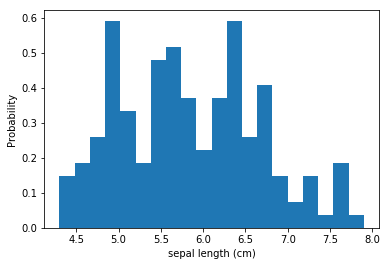

In [14]:
#Histogram of sepal length
plt.hist(df['sepal length (cm)'], normed=True, bins=20)
plt.xlabel('sepal length (cm)')
plt.ylabel('Probability');

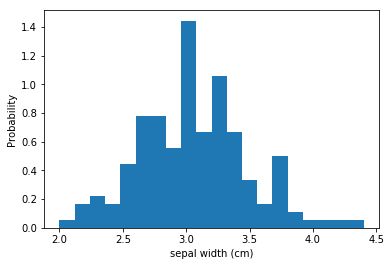

In [15]:
#Histogram of sepal width
plt.hist(df['sepal width (cm)'], normed=True, bins=20)
plt.xlabel('sepal width (cm)')
plt.ylabel('Probability');

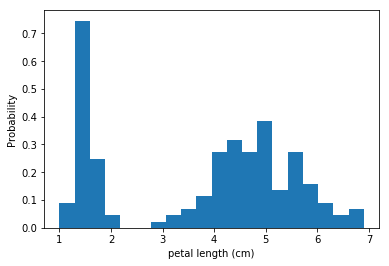

In [16]:
#Histogram of petal length
plt.hist(df['petal length (cm)'], normed=True, bins=20)
plt.xlabel('petal length (cm)')
plt.ylabel('Probability');

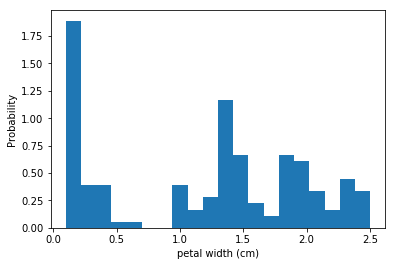

In [17]:
#Histogram of petal width
plt.hist(df['petal width (cm)'], normed=True, bins=20)
plt.xlabel('petal width (cm)')
plt.ylabel('Probability');

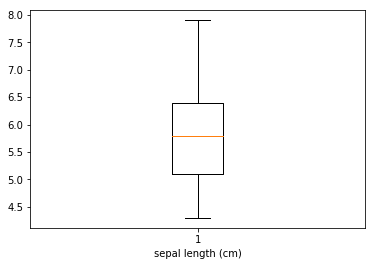

In [18]:
#Boxplot of sepal length
plt.boxplot(df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')

In [19]:
#Checking for outliers using +/-3 sd method for sepal length
(np.abs(stats.zscore(df['sepal length (cm)'])) > 3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

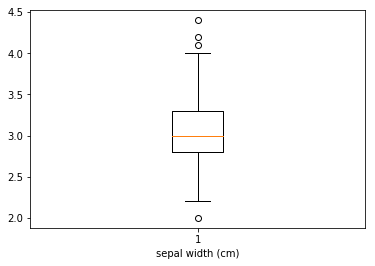

In [20]:
#Boxplot of sepal width
plt.boxplot(df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')

In [21]:
#Checking for outliers using +/-3 sd method for sepal width
(np.abs(stats.zscore(df['sepal width (cm)'])) > 3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

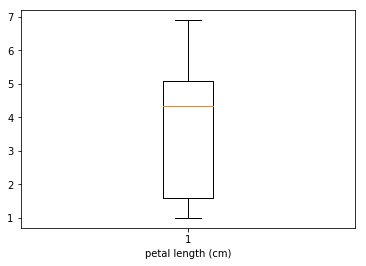

In [22]:
#Boxplot of petal length
plt.boxplot(df['petal length (cm)'])
plt.xlabel('petal length (cm)')

In [23]:
#Checking for outliers using +/-3 sd method for petal length
(np.abs(stats.zscore(df['petal length (cm)'])) > 3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

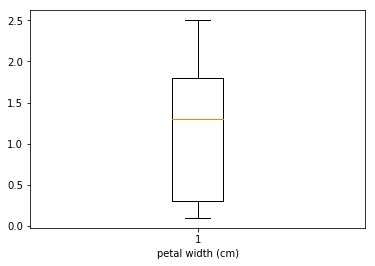

In [24]:
#Boxplot of petal width
plt.boxplot(df['petal width (cm)'])
plt.xlabel('petal width (cm)')

In [25]:
#Checking for outliers using +/-3 sd method for petal width
(np.abs(stats.zscore(df['petal width (cm)'])) > 3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [26]:
#Dividing data into training and testing - Hold out cross validation
X_train, X_test, y_train, y_test = train_test_split(df[iris_data['feature_names']], df['target'], test_size=0.3, random_state=42,stratify = df['target'])

In [27]:
#Fitting the Standardizing the features
standardized_X = StandardScaler().fit(X_train)

In [28]:
#Standardizing the features
X_train_standardized = standardized_X.transform(X_train)

In [29]:
#Fitting the TSNE dimensiononality reduction
tsne_X = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_train_standardized_tsne = tsne_X.fit_transform(X_train_standardized)

[t-SNE] Computing 104 nearest neighbors...
[t-SNE] Indexed 105 samples in 0.014s...
[t-SNE] Computed neighbors for 105 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 105 / 105
[t-SNE] Mean sigma: 1.176320
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.973068
[t-SNE] Error after 300 iterations: 0.103128


In [30]:
#Converting the target variable to numpy array
nparr_y_train = np.array(y_train)

In [65]:
#Decoding the target variable for plotting
target_train = []
for i in nparr_y_train:
    if i=="setosa":
        target_train.append(int(0))
    elif i=="versicolor":
        target_train.append(int(1))
    else:
        target_train.append(int(2))

In [79]:
#Considering only sepal length, sepal width as features for svm modeling
X,y = X_train_standardized[:,:2],y_train

In [80]:
#Plotting functions
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

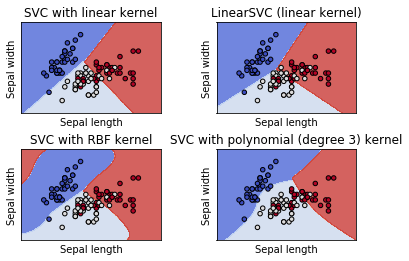

In [81]:
####################### Plotting the different SVM Classifiers ###################

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, target_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=target_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()